# EDA Project: Analysis of Movie Performance

1. Introduction
- Objective: To explore and analyze the movie dataset, uncovering insights related to movie performance, ratings, and revenue distribution across different categories.

## Data description

### 1. IMDb Dataset - df

- **Content**: This dataset includes general information about the movie, such as:
    - **moive_name**: The name of the movie
    - **movie_link**: IMDb link that link to the movie
    - **year**: The year that is on cinema 
    - **duration**: How long is the movie
    - **level**: Parent guide level
    - **rating**: rating in IMDb

### 2. revenue Dataset - df_rev
- **Content**: This dataset includes Top 3000 Lifetime Grosses revenue for each movie, such as:
    - **movie_name**: The name of the movie
    - **ww_lifetime_gross_rev**: Worldwide Lifetime Gross revenue
    - **domestic_lifetime_gross_rev**: America Lifetime Gross revenue
    - **domestic_percent**: America Lifetime Gross revenue out of Worldwide Lifetime Gross revenue
    - **foreign_lifetime_gross_rev**: Lifetime Gross revenue except America
    - **foreign_percent**: Gross revenue except America out of Worldwide Lifetime Gross revenue
    - **year**: The year that is on cinema 


    

In [166]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
# url = "https://www.imdb.com/chart/top/"
# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
# }

# # Create a session
# session = requests.Session()

# # Send a GET request with headers
# response = session.get(url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     soup = bs(response.text, 'html.parser')
#     # (Continue with parsing as shown previously)
# else:
#     print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

# table = soup.find(attrs={"data-testid": "chart-layout-main-column"})
# table = table.find('ul')

# table_details = table.find_all('li')

# df = []
# for detail in table_details:
#     movie_name = detail.find('h3').text
#     movie_link = detail.find('a').get("href")
#     row = detail.find('div', {"class": "cli-children"})
#     subs = row.find("div", {"class": "cli-title-metadata"})
#     all_subs = subs.find_all('span')
#     ratings = row.find("div", {"class": "cli-ratings-container"})
#     rate = ratings.find("span", {"class": "ipc-rating-star--rating"}).text
#     ls = []
#     for sub in all_subs:
#         pending = sub.text
#         ls.append(pending)

#     movie_data = {
#         "movie_name": movie_name,
#         "movie_link": "https://www.imdb.com" + movie_link,
#         "year": ls[0],
#         "duration": ls[1],
#         "level": ls[2],
#         "rating": rate,
#     }
#     df.append(movie_data)

# table_details[0].find('h3').text
# table_details[0].find('a').get("href")
# row = table_details[0].find('div', {"class": "cli-children"})
# movie_name = row.find('h3').text
# subs = row.find("div", {"class": "cli-title-metadata"})
# all_subs = subs.find_all('span')
# ls = []
# for sub in all_subs:
#     pending = sub.text
#     ls.append(pending)

# ratings = row.find("div", {"class": "cli-ratings-container"})
# rate = ratings.find("span", {"class": "ipc-rating-star--rating"}).text
# comments = ratings.find("span", {"class": "ipc-rating-star--voteCount"}).text

In [66]:
# Set up Selenium WebDriver options
chrome_options = Options()
# chrome_options.add_argument('--headless')  # Run in headless mode (optional)
# chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Create a WebDriver instance
driver = webdriver.Chrome(options=chrome_options)

# URL to scrape
url = "https://www.imdb.com/chart/top/"
driver.get(url)
print("open website")

# Wait for the page to load
time.sleep(3)  # You may want to use WebDriverWait for a more robust solution

# Locate the main movie list
# table = driver.find_element(By.CSS_SELECTOR, '[data-testid="chart-layout-main-column"]')
table = driver.find_element(By.CLASS_NAME, "ipc-metadata-list.ipc-metadata-list--dividers-between")
table_details = table.find_elements(By.TAG_NAME, 'li')

df = []
for detail in table_details:
    movie_name = detail.find_element(By.TAG_NAME, 'h3').text
    movie_link = detail.find_element(By.TAG_NAME, 'a').get_attribute("href")
    
    row = detail.find_element(By.CLASS_NAME, 'cli-children')
    subs = row.find_element(By.CLASS_NAME, 'cli-title-metadata')
    all_subs = subs.find_elements(By.TAG_NAME, 'span')
    
    ratings = row.find_element(By.CLASS_NAME, 'cli-ratings-container')
    rate = ratings.find_element(By.CLASS_NAME, 'ipc-rating-star--rating').text
    
    ls = [sub.text for sub in all_subs]
    while len(ls) < 3:
        ls.append("")

    movie_data = {
        "movie_name": movie_name,
        "movie_link": movie_link,
        "year": ls[0],
        "duration": ls[1],
        "level": ls[2],
        "rating": rate,
    }
    df.append(movie_data)

# Convert to DataFrame for further analysis if needed
df = pd.DataFrame(df)

# Close the WebDriver
driver.quit()

open website


In [67]:
df_copy = df.copy()

In [68]:
df[["rank", "movie_name"]] = df["movie_name"].apply(lambda x: pd.Series(x.split(". ", 1)))

In [91]:
df["movie_name"] = df["movie_name"].str.strip()

In [69]:
# Transforming data into correct type
df['year'] = df['year'].astype(int)
df['rating'] = df['rating'].astype(float)
df['rank'] = df['rank'].astype(int)

In [70]:
# Frequency table
frequency_table = df.copy()
# frequency_table['freq'] = pd.cut(df['year'],10)
# Count of each interval
# Define custom bins for the years
# Define the bin edges
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]

# Define the corresponding labels for the bins
labels = ['1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970',
          '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020', '2020-2025']
# Create intervals
frequency_table['freq'] = pd.cut(frequency_table['year'], bins=bins, labels=labels, right=False)
freq_table = frequency_table.groupby("freq")['rank'].count().reset_index().rename(columns={'rank': 'count'})

# Sorting descending
freq_table.sort_values(['count'], ascending=False) 

C:\Users\shuto\AppData\Local\Temp\ipykernel_26916\2440867895.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_table = frequency_table.groupby("freq")['rank'].count().reset_index().rename(columns={'rank': 'count'})


,freq,count
8,2000-2010,48
9,2010-2020,44
7,1990-2000,40
6,1980-1990,26
3,1950-1960,22
5,1970-1980,17
4,1960-1970,16
10,2020-2025,13
2,1940-1950,12
0,1920-1930,6


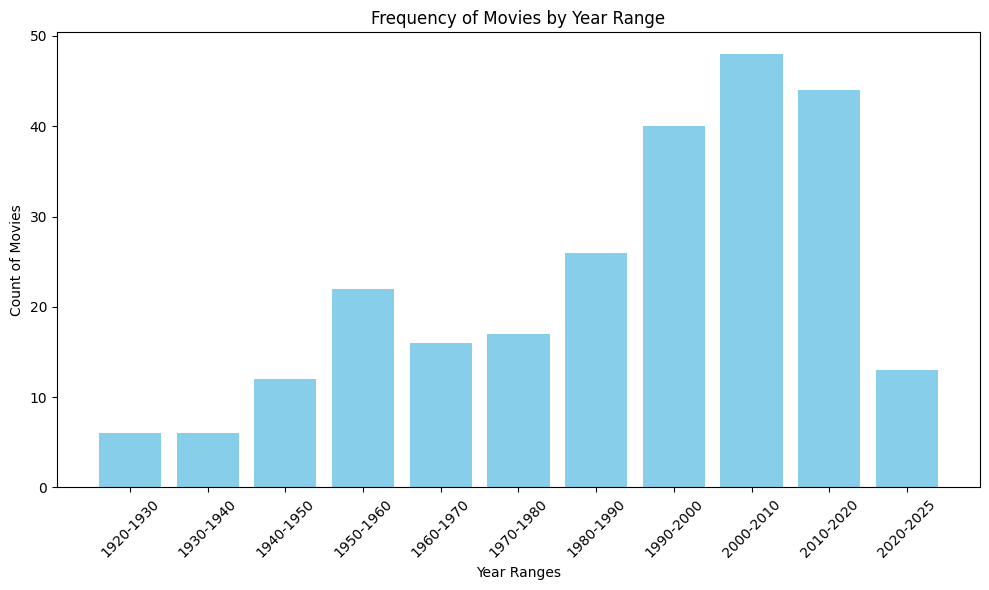

In [71]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(freq_table['freq'], freq_table['count'], color='skyblue')
plt.xlabel('Year Ranges')
plt.ylabel('Count of Movies')
plt.title('Frequency of Movies by Year Range')
plt.xticks(rotation=45)
# plt.grid(axis='y')


# Show the plot
plt.tight_layout()
plt.show()

- **Top Counts**: The decade 2000-2010 has the highest count of 48 highest-rated movies, followed closely by 2010-2020 with 44.
- **Significant 1990s**: The 1990-2000 range also shows strong performance with 40 movies, indicating a culturally impactful era.
- **Overall Trend**: The data suggests an upward trend in quality and quantity of highly-rated films, particularly from the late 20th century onward.

# Revenues of the movies

In [ ]:
num = range(0, 3000, 200)
rev = []
for i in num:
    urls = [f"https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW&offset={i}"]
    for url in urls:
        r = requests.get(url)
        soup = bs(r.content)
        table = soup.find(attrs = {"id": "table"})
        rows = table.find_all("tr")[1:]
        for row in rows:
            rank =  row.find_all("td")[0].text
            movie_name =  row.find_all("td")[1].text
            ww_lifetime_gross_rev = row.find_all("td")[2].text
            domestic_lifetime_gross_rev = row.find_all("td")[3].text
            domestic_percent = row.find_all("td")[4].text
            foreign_lifetime_gross_rev = row.find_all("td")[5].text
            foreign_percent = row.find_all("td")[6].text
            year = row.find_all("td")[7].text
            details = {
                "rank": rank,
                "movie_name": movie_name,
                "ww_lifetime_gross_rev": ww_lifetime_gross_rev,
                "domestic_lifetime_gross_rev": domestic_lifetime_gross_rev,
                "domestic_percent": domestic_percent,
                "foreign_lifetime_gross_rev": foreign_lifetime_gross_rev,
                "foreign_percent": foreign_percent,
                "year": year
                }
            rev.append(details)

df_rev = pd.DataFrame(rev)

In [222]:
def clean_text(text):
    text = text.replace("$", "")
    text = text.replace(",", "")
    text = text.replace("%", "")
    text = text.strip()
    return text

In [223]:
df_rev["domestic_lifetime_gross_rev"] = df_rev["domestic_lifetime_gross_rev"].apply(clean_text)
df_rev["ww_lifetime_gross_rev"] = df_rev["ww_lifetime_gross_rev"].apply(clean_text)
df_rev["domestic_percent"] = df_rev["domestic_percent"].apply(clean_text)
df_rev["foreign_lifetime_gross_rev"] = df_rev["foreign_lifetime_gross_rev"].apply(clean_text)
df_rev["foreign_percent"] = df_rev["foreign_percent"].apply(clean_text)


In [224]:
df_rev["domestic_lifetime_gross_rev"] = df_rev["domestic_lifetime_gross_rev"].apply(clean_text)
df_rev["ww_lifetime_gross_rev"] = df_rev["ww_lifetime_gross_rev"].apply(clean_text)
df_rev["domestic_percent"] = df_rev["domestic_percent"].apply(clean_text)
df_rev["foreign_lifetime_gross_rev"] = df_rev["foreign_lifetime_gross_rev"].apply(clean_text)
df_rev["foreign_percent"] = df_rev["foreign_percent"].apply(clean_text)


In [140]:
df_rev["movie_name"] = df_rev["movie_name"].str.strip()
df_merge= pd.merge(df, df_rev, on = "movie_name", how = "inner")

In [150]:
def convert_to_mins(col):
    hour, mins = col.split("h")
    hour = int(hour)
    mins = mins.replace("m", "").strip()
    mins = int(mins) if mins else 0 
    return hour*60 + mins


In [ ]:
df_merge["duration"] = df_merge["duration"].apply(convert_to_mins)
df_merge["rev_rank"] = df_merge["rev_rank"].apply(clean_text)

In [158]:
df_merge = df_merge.rename(
    columns = {
    "year_x": "year",
    "rank_x": "imdb_rank",
    "rank_y": "rev_rank"}

)

In [164]:
df_merge.drop(columns=["year_y"], inplace= True)

In [165]:
df_merge["rev_rank"] = df_merge["rev_rank"].apply(clean_text)

Index(['movie_name', 'movie_link', 'year', 'duration', 'level', 'rating',
       'imdb_rank', 'rev_rank', 'ww_lifetime_gross_rev',
       'domestic_lifetime_gross_rev', 'domestic_percent',
       'foreign_lifetime_gross_rev', 'foreign_percent'],
      dtype='object')

# Identify Revenue Trends by Year

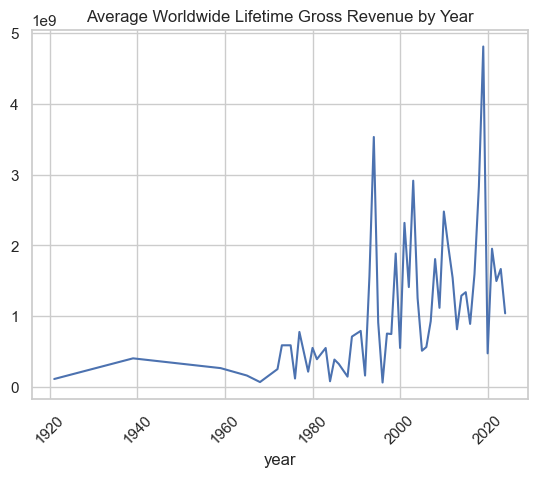

In [219]:
average_revenue_by_year = df_merge.groupby('year')['ww_lifetime_gross_rev'].sum()
average_revenue_by_year.plot(kind='line')
plt.xticks(rotation=45)
plt.title('Average Worldwide Lifetime Gross Revenue by Year')
plt.show()

In [238]:
df_merge.pivot_table(values= "ww_lifetime_gross_rev", index= ["movie_name","year"], aggfunc= {"ww_lifetime_gross_rev": sum}).sort_values(by = "ww_lifetime_gross_rev", ascending= False).head(5)

C:\Users\shuto\AppData\Local\Temp\ipykernel_26916\4213224245.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,,ww_lifetime_gross_rev
movie_name,year,
Avengers: Endgame,2019,2.799439e+09
The Lion King,1994,2.641182e+09
Avengers: Infinity War,2018,2.052415e+09
Spider-Man: No Way Home,2021,1.952724e+09
Top Gun: Maverick,2022,1.495696e+09


- The chart shows several notable spikes in average worldwide lifetime gross revenue, especially in the late 1990s and early 2000s.
- These spikes correspond to the release of major blockbuster films and successful franchises that attracted large audiences.
- These fluctuations highlight the film industry's responsiveness to cultural phenomena and changing audience preferences over time.

# Explore Factors vs. Gross Revenue

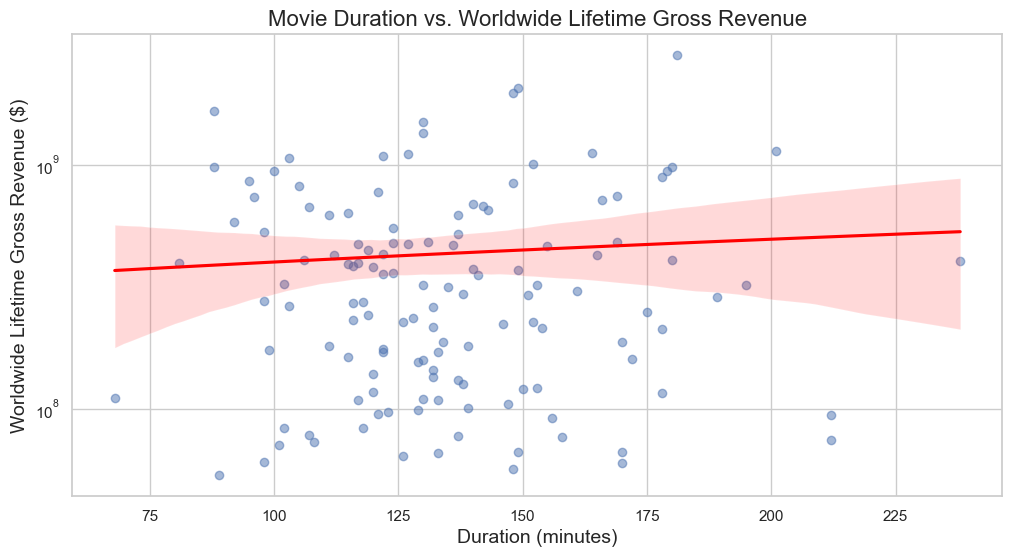

In [216]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merge, x='duration', y='ww_lifetime_gross_rev', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Add titles and labels
plt.title('Movie Duration vs. Worldwide Lifetime Gross Revenue', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Worldwide Lifetime Gross Revenue ($)', fontsize=14)
plt.xscale('linear')  # Optional: adjust scale if needed
plt.yscale('log')  # Optional: log scale for better visibility of revenue distribution
plt.show()

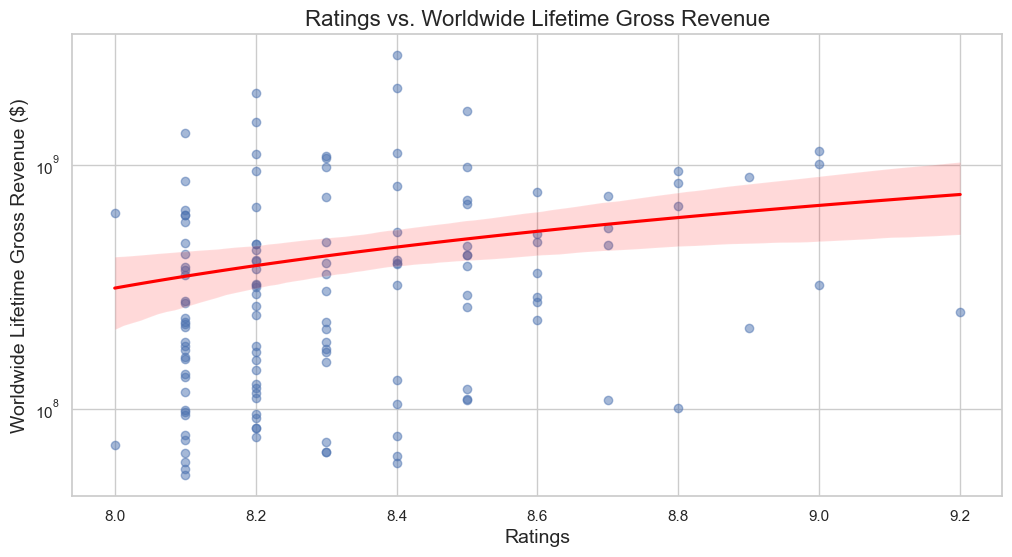

In [220]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a scatter plot with a trend line
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merge, x='rating', y='ww_lifetime_gross_rev', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Add titles and labels
plt.title('Ratings vs. Worldwide Lifetime Gross Revenue', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Worldwide Lifetime Gross Revenue ($)', fontsize=14)
plt.xscale('linear')  # Optional: adjust scale if needed
plt.yscale('log')  # Optional: log scale for better visibility of revenue distribution
plt.show()

**Movie Duration vs. Worldwide Lifetime Gross Revenue:**
- There is a slight positive trend, indicating that longer movies tend to earn more revenue.
- Data points are dispersed with some outliers, suggesting exceptions to this trend.
- The red shaded area represents a confidence interval, showing the likely range of the true relationship.
**Ratings vs. Worldwide Lifetime Gross Revenue:**
- A stronger positive correlation is observed; higher-rated films generally perform better at the box office.
- Data points cluster closely around the trend line, indicating a more consistent relationship.